# Stock Analysis

In this project we will focus in exploratory data analysis of stock prices.Keep in mind, this project is just meant to practice visualizations and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.


We will focus on some US bank stocks and see how they progressed thoughtout the financial crisis of 2016. Then do a quick comparison with last 10 years data.

## Import your important libraries:

In [415]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [416]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import yfinance as yf



### Import plotly and cufflinks for  interactive graphs
### cufflinks connects pandas dataframe  with plotly library and helps to run the visualizations directly

In [417]:
!pip install plotly
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [418]:

import plotly 
import cufflinks as cf
cf.go_offline()

In [419]:
sns.set_style('whitegrid')

## Data

We need to get data using yahoo finance.We will get stock information for the following banks:

- Bank of America
- CitiGroup
- GoldmanSachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

Pull th stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with variable name for that bank being its ticker symbol. This will involve few steps:**

1. Use datetime to set start and end datetime objects.
2. Figure out ticker symbol for each bank.
3. Figure out how to use yfinance to grab info on the stock

In [420]:
start = dt.date(year = 2006, month = 1 , day = 1)
end = dt.date(2016,1,1)

In [421]:
#pull the stock information from yfinanc
#Process: create a df(BAC)->pull data using yf library

BAC = yf.download('BAC', start, end)          #Bank of America
C = yf.download('C', start, end)              #Citigroup
GS = yf.download('GS', start, end)            #Goldmansachs
JPM = yf.download('JPM', start, end)          #JPMorgan Chase
MS = yf.download('MS', start, end)            #MorganStanley
WFC = yf.download('WFC', start, end)          #WellsFargo

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [422]:
WFC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,31.600000,31.975000,31.195000,31.900000,18.979551,11016400
2006-01-04,31.799999,31.820000,31.365000,31.530001,18.759415,10870000
2006-01-05,31.500000,31.555000,31.309999,31.495001,18.738600,10158000
2006-01-06,31.580000,31.775000,31.385000,31.680000,18.848658,8403800
2006-01-09,31.674999,31.825001,31.555000,31.674999,18.845688,5619600
...,...,...,...,...,...,...
2015-12-24,54.970001,55.090000,54.709999,54.820000,42.477665,4999400
2015-12-28,54.549999,54.779999,54.169998,54.680000,42.369175,8288800
2015-12-29,55.110001,55.349998,54.990002,55.290001,42.841831,7894900


### Create a list of ticker symbols(as strings) in alphabetical order. Call this list: tickers.

In [423]:
tickers = 'BAC C GS JPM MS WFC'.split()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### Use pd.concat to concatenate the bank dataframes together to a single dataframe called bank_stocks. Set the key argument equal to the tickers list.

In [424]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1,keys=tickers)
bank_stocks

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.544905  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.209898  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.250097  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.203197  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.223280  15619400   
...               ...        ...        ...        ...        ...       ...   
2015-12-24  17.320000  17.379999  17.219999  17.270000  14.271372  29369400   
2015-12-28  17.219999  17.230000  16.980000  17.129999  14.155680  41777500   
2015-12-29  17.250000  17.350000  17.160000  17.280001  14.279634  45670400   
2015-12-30  17.200001  17.240000  17.040001  17.049999  14.089570  35066400   
2015-12-31  17.010000  17.070000  16.830000  16.830000  13.907768  47153000   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28   52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29   52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30   52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31   52.070000   52.389999   51.750000   51.750000  ...  31.770000   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  32.661312  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  32.683727  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  32.773338  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  32.806950  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  33.154228  4144500  31.674999  31.825001  31.555000   
...               ...        ...      ...        ...        ...        ...   
2015-12-24  32.480000  25.353054  2798200  54.970001  55.090000  54.709999   
2015-12-28  32.169998  25.111073  5420300  54.549999  54.779999  54.169998   
2015-12-29  32.549999  25.407690  6388200  55.110001  55.349998  54.990002   
2015-12-30  32.230000  25.157906  5057200  55.270000  55.310001  54.790001   
2015-12-31  31.809999  24.830067  8154300  54.509998  54.950001  54.220001   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  18.979551  11016400  
2006-01-04  31.530001  18.759415  10870000  
2006-01-05  31.495001  18.738600  10158000  
2006-01-06  31.680000  18.848658   8403800  
2006-01-09  31.674999  18.845688   5619600  
...               ...        ...       ...  
2015-12-24  54.820000  42.477665   4999400  
2015-12-28  54.680000  42.369175   8288800  
2015-12-29  55.290001  42.841831   7894900  
2015-12-30  54.889999  42.531898   8016900  
2015-12-31  54.360001  42.121220  10929800  

[2517 rows x 36 columns]

### Set the column name levels 'Bank Tickers' and 'Stock info':

In [425]:
bank_stocks.columns.names =['Bank Tickers', 'Stock Info']
bank_stocks.columns.names

FrozenList(['Bank Tickers', 'Stock Info'])

### Check the head of the bank_stocks dataframe

In [426]:
bank_stocks.head()

Bank Tickers        BAC                                                        \
Stock Info         Open       High        Low      Close  Adj Close    Volume   
Date                                                                            
2006-01-03    46.919998  47.180000  46.150002  47.080002  31.544905  16296700   
2006-01-04    47.000000  47.240002  46.450001  46.580002  31.209898  17757900   
2006-01-05    46.580002  46.830002  46.320000  46.639999  31.250097  14970700   
2006-01-06    46.799999  46.910000  46.349998  46.570000  31.203197  12599800   
2006-01-09    46.720001  46.970001  46.360001  46.599998  31.223280  15619400   

Bank Tickers           C                                      ...         MS  \
Stock Info          Open        High         Low       Close  ...        Low   
Date                                                          ...              
2006-01-03    490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04    488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05    484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06    488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09    486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Tickers                                       WFC                        \
Stock Info        Close  Adj Close   Volume       Open       High        Low   
Date                                                                           
2006-01-03    58.310001  32.661312  5377000  31.600000  31.975000  31.195000   
2006-01-04    58.349998  32.683727  7977800  31.799999  31.820000  31.365000   
2006-01-05    58.509998  32.773338  5778000  31.500000  31.555000  31.309999   
2006-01-06    58.570000  32.806950  6889800  31.580000  31.775000  31.385000   
2006-01-09    59.189999  33.154228  4144500  31.674999  31.825001  31.555000   

Bank Tickers                                  
Stock Info        Close  Adj Close    Volume  
Date                                          
2006-01-03    31.900000  18.979551  11016400  
2006-01-04    31.530001  18.759415  10870000  
2006-01-05    31.495001  18.738600  10158000  
2006-01-06    31.680000  18.848658   8403800  
2006-01-09    31.674999  18.845688   5619600  

[5 rows x 36 columns]

## Exploratory Data Analysis

### Let's explore the data a bit! What is the max Close price for each bank's stock throughout the time period

In [427]:
# use cross section for multiindex data frames

bank_stocks.xs('Close',axis=1,level=1) # Returns the dataframe with Close columns


Bank Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


In [428]:
bank_stocks.xs('Close',axis=1,level=1).max() #Returns the max value of each column

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Create a new empty DataFrame called returns. The dataframe will contain the returns for each bank's stock. returns are typically defined by 
$$
r_t = \frac{P_t - P_{t-1}}{ P_t-1} = \frac{P_t}{P_{t-1}}-1 
$$


In [429]:
returns = pd.DataFrame()
print(returns)

Empty DataFrame
Columns: []
Index: []


### Use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and sets it as a column in the returns DataFrame.

In [430]:
for i in tickers: 
    returns[i + ' Returns'] = bank_stocks.xs('Close', axis = 1, level = 1)[i].pct_change() 
    

In [431]:
returns


,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


**Observations**

- _What pct_change() does here is it computes the fractional change from the immidiately previous row by default. It is useful for comparing the fraction of change in a time series of elements. Remeber here it is a fraction if yoou want to change it to percentage u want to multiply it with 100_
- _So we have got the columns for each of the stock tickers for each trading day_
- _For the first day the return is obiviously **Nan** as there was no prior day element to calculate it_
- _From the second row we can see the positive and negative returns , negatives are the days where it went down and positives are the days when it went up_

### Create a pair plot using seaborn of the returns dataframe. Do any stocks stands out ? Why or why not?

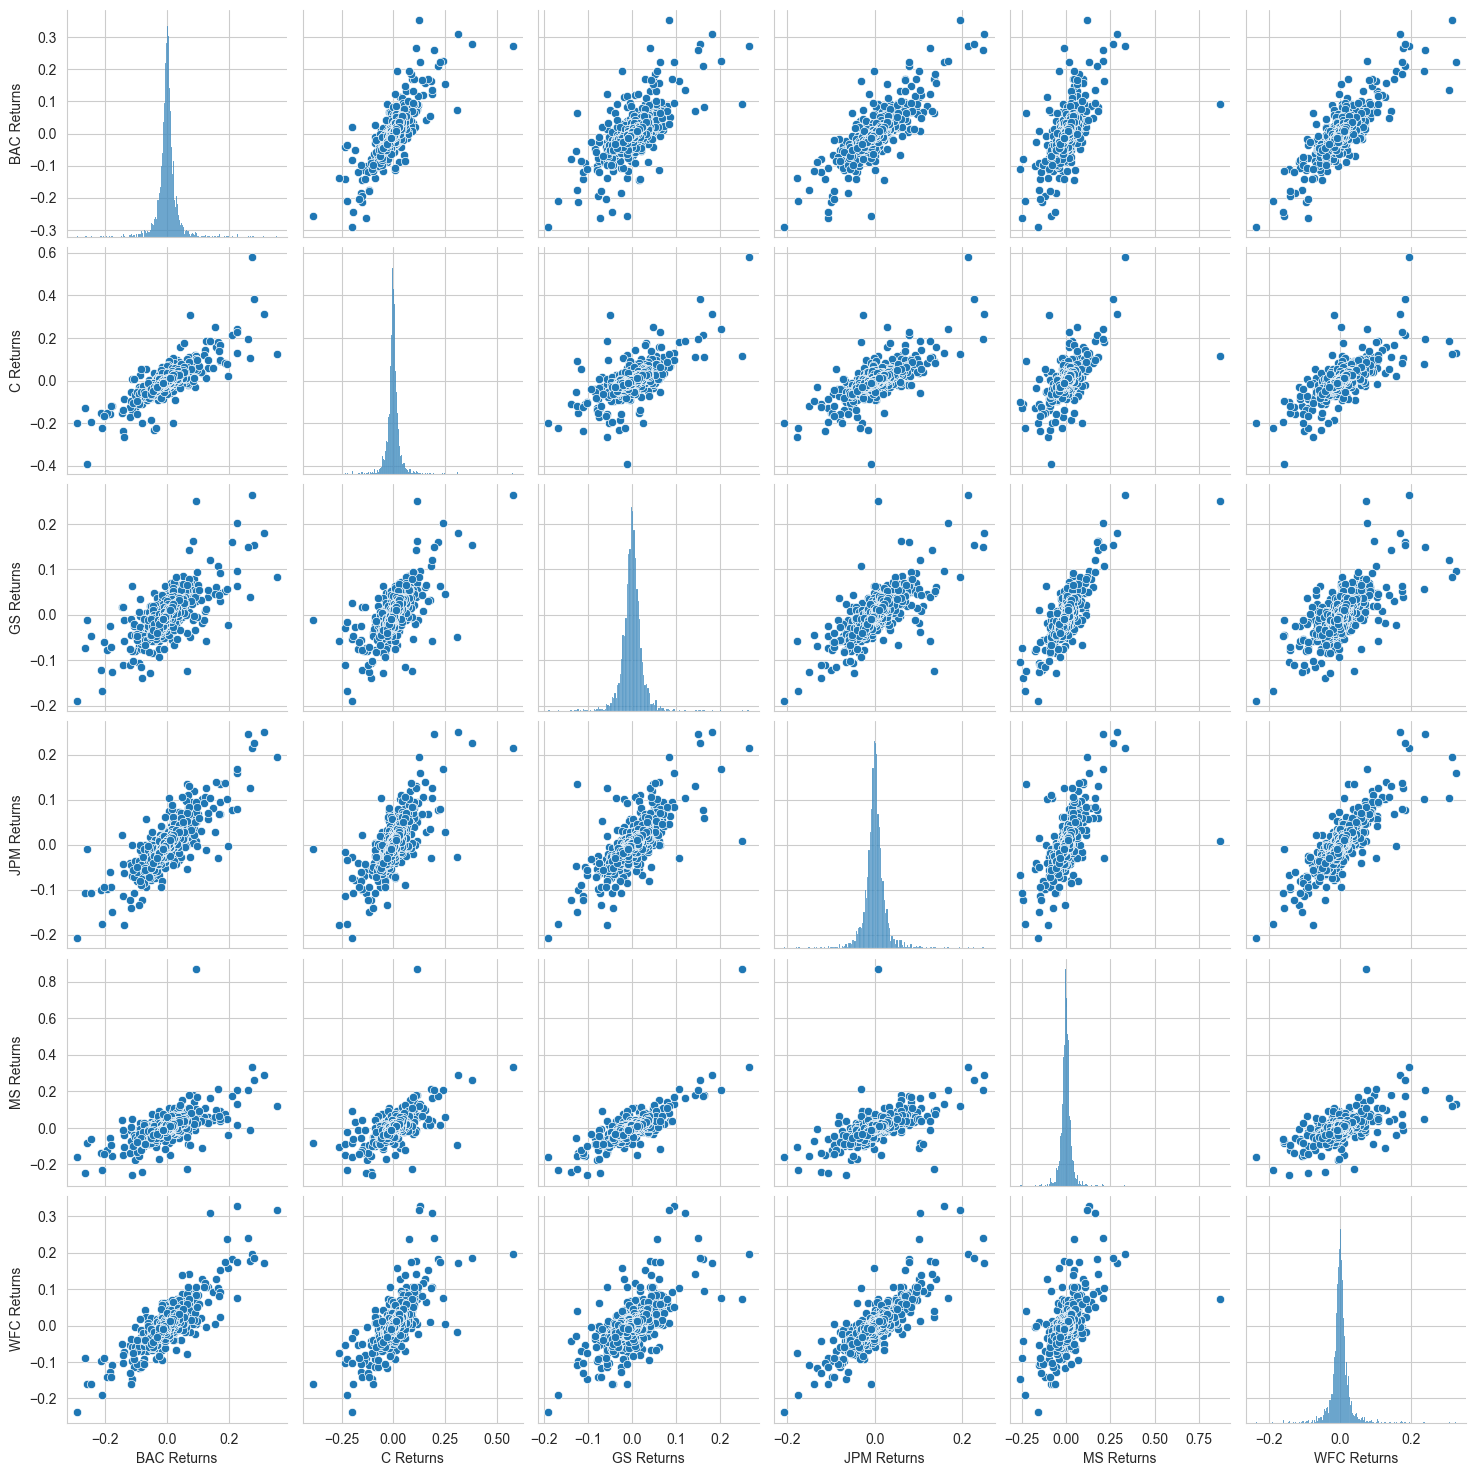

In [432]:
sns.pairplot(returns)

**Observations**
- _Diagonal elements are univariant data i.e, just for that particular column_
- _Off diagonal elements are bivariant data_
- _What pairplot does here is it creates a group of scatter plots for each pair of the numerical data in the data frame,For exit will create a 'BAC' vs 'C' scatterplot, 'BAC' vs 'GS' scatter plot and so on._
- _So we have all of these tickers/banks on X-axis and the same banks as well as on the Y-axis_.
- _So if you compare 'WFC Returns' to the 'WFC Returns' it is a univariant data so therefore we have a Histogram._
- _If you compare 'WFC Returns' to the other banks we have the scatter plots to analyse the data._
- _Its very important to check the scales for it , almost everything are in decimals on both X and Y axis._
- _Sometimes based on the data you can get different scales for one of the columns and that graph will look very different._
- _Lets look at the 'MS Returns' graph is going from -0.25 to 0.75 and there is only one outlier point that is there at 0.75 which makes the slope is much higher but if you ignore the outlier the slope will be much equal as the distance from zero on both sides is almost equal for rest of the datapoints._ 
- _Same with the 'Citi Group' except few(countable) points most of them lies in the range of -0.25 to 0.25._
- _So if you analyse this for 'BAC Returns' compared to other banks, there is a very strong correlation between these banks or the returns of these banks as the X-axis goes up Y-axis goes up as well and that pattern is prevalent for all combinations of the all pairs of the banks here._


In [433]:
returns.corr()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
BAC Returns,1.000000,0.802752,0.685271,0.815410,0.643840,0.828337
C Returns,0.802752,1.000000,0.668989,0.739045,0.634352,0.717386
GS Returns,0.685271,0.668989,1.000000,0.738671,0.805155,0.662847
JPM Returns,0.815410,0.739045,0.738671,1.000000,0.646711,0.826276
MS Returns,0.643840,0.634352,0.805155,0.646711,1.000000,0.598681
WFC Returns,0.828337,0.717386,0.662847,0.826276,0.598681,1.000000


**Observations**
- _We can see the correlation in the matrix format._
- _We can use these later to create a heat map._
- _'BAC Returns have strong relationship with the 'City Bank', 'JPMorgan' and 'WellsFargo' compared to the 'GoldmanSachs' and 'Morgan Stanley' banks._

### Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen on those days?

In [434]:
#Best single day returns
returns.max()  #Returns the max value of each column 

BAC Returns    0.352691
C Returns      0.578249
GS Returns     0.264678
JPM Returns    0.250967
MS Returns     0.869835
WFC Returns    0.327645
dtype: float64

In [435]:
#Best single day returns
returns.idxmax() #Returns the index of the max value

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [436]:
#Worst single day returns
returns.idxmin() #Returns the index of the min value

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

**Did anything significant happen on those days?**

**Best days**
- _If you notice the JPMorgan returns the best performance day(2009-01-21) was exactly after the worst performance day(2009-01-20) and the reason for that was it received a 700 billion dollar bailout from the federal reserve._




**Worst days**
- _If you look carefully four of the banks Bank of America, Goldman Sachs, JPMorgan and Wells Fargo had the worst return on the same day._

   *What happened exactly?*
  
- _On the particular day 2009-01-20, The Icelands banks collapsed._
  
- _InShort, About Iceland banks, During 2000-2007 the Icelandic banks were privatised and saw quiet a bit of Boom years so much so that the country's entire economy and GDP became dependent on the performance of the banks, and when the economy collapsed theirs banks and government collapsed . That might have created a widespread of panic in the market which might be one of the reasons for the decline on the particular day [[ 1 ](https://en.wikipedia.org/wiki/2009_Icelandic_financial_crisis_protests)][[2 . Finacncial crisis 2009](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis)]._
  


- For the City Bank,On 27th February 2009,The US government has reached a deal to take a stake of 30 to 40 percent , which raised concerns among the Investors regarding the nationalisation of the banks and thats why it has the biggest decline of its stock worldwide on that particular day.

[More Details](https://www.theguardian.com/business/2009/jan/20/stock-market-drop-obama-inauguration)


### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire period? Which would u classify as the riskiest for the year 2015?

In [437]:
#For the entire 10 years period (More riskier higher the std.deviation)
returns.std()


BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

**Observations**

- _There isnt much to differentiate between these stocks. Statistically, you can say Citi bank is the most riskiest but its only by the bearest of margin really insignificant. Practically they all had similiar risk._

In [438]:
#For year 2015

In [439]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

**Obseravtion** 

- _There isnt much difference among these stocks they all posses similiar risk._

### Create a histplot using seaborn of the 2015 returns for the Morgan Stanley


<Axes: xlabel='MS Returns', ylabel='Count'>

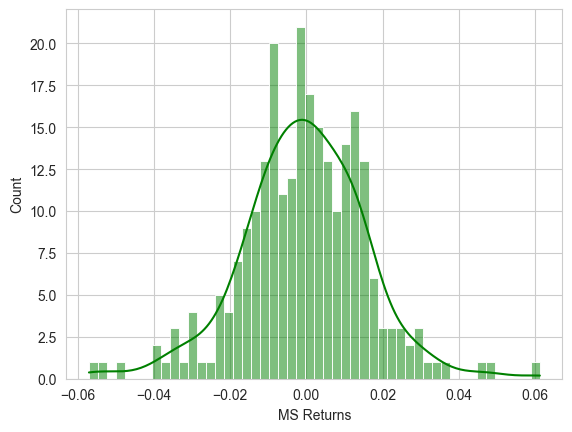

In [440]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color ='g', bins =50, kde = True)

**Observations** 
- _If you see the data most of the data is in between -0.02 and 0.02. If you imagine this in percentage by multiplying the numbers with 100,so most of the daily return within plus or  minus 2% of the previous day number._

### Create a histplot using seaborn of the 2008 returns for the CitiGroup

<Axes: xlabel='C Returns', ylabel='Count'>

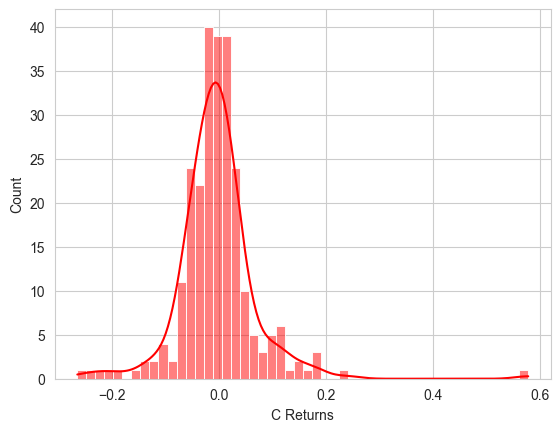

In [441]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], color = 'r', bins = 50, kde= True)

**Observations**

- _If you notice the Kde graph there is a long tail on the right side that is because of some point 0.6 . Basically it says that they have a day where there is very high return approx. 6 percent but its only few days maybe only one or two days._

### Create a line plot showing Close price for each bank for the entire index of time.

/Users/tanveer/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



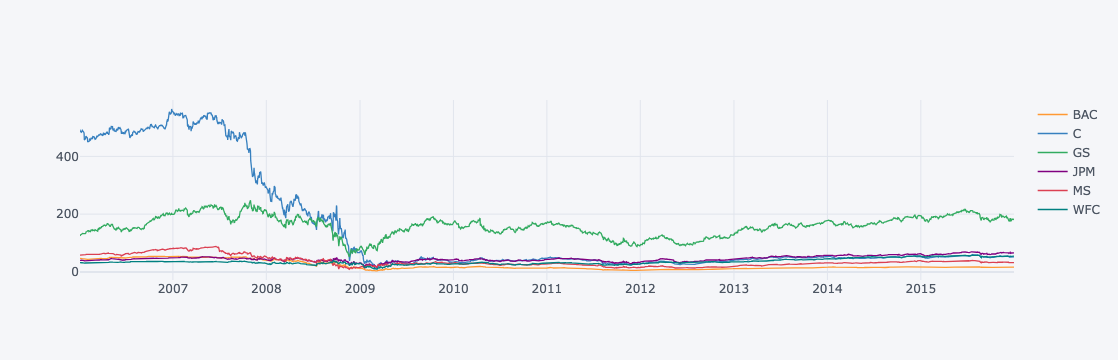

In [442]:
bank_stocks.xs('Close', axis = 1 ,level = 1).iplot(kind = 'line')

### Moving Averages

Lets analyze the moving average for these stocks in the year 2008


In [443]:
BAC.loc['2008-01-01':'2008-12-31'].rolling(window=30).std().head(30)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-14,NaN,NaN,NaN,NaN,NaN,NaN


### Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

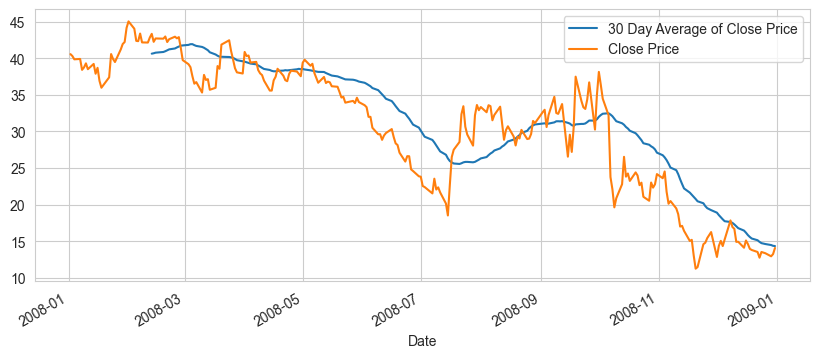

In [444]:
BAC.loc['2008-01-01':'2008-12-31']['Close'].rolling(window=30).mean().plot(figsize = (10,4), label = '30 Day Average of Close Price')
BAC.loc['2008-01-01':'2008-12-31']['Close'].plot(label = 'Close Price')
plt.legend()

**Observations**

- _If you see the difference between rolling average and actual closing stock prices, the real stock prices can have sharp declines and inclines and what the 30 day average does is it ignores those sharp edges and smoothens the data based on average of the last 30 days at each point. This is basically used to analyse the stock data so the sudden falls can be ignored and its not the part of the stock analysis unless it is sustained over a longer period of time._
- _If u see the data between 2008-05 to 2008-07 the stock price started to fall but the average price was still high and because the fall sustained over a period of time the avg value came down as well. The avg values has much more roundish edge and the actual closing price has a sharp edge and the same thing happens between the period 2008-07 to 2008-11 as well._


### Create a heatmap of the correlation between the stocks Close price.

In [445]:
bank_stocks.xs('Close', axis=1, level=1).corr()

Bank Tickers,BAC,C,GS,JPM,MS,WFC
Bank Tickers,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<Axes: xlabel='Bank Tickers', ylabel='Bank Tickers'>

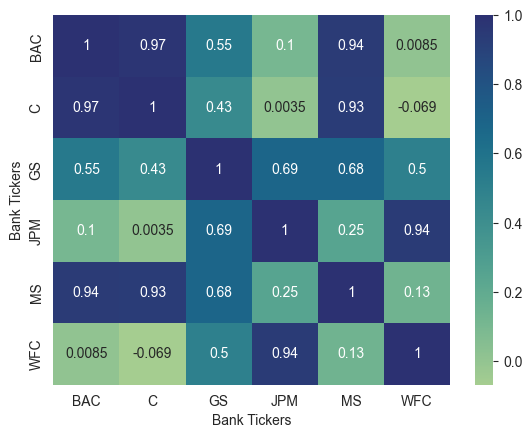

In [446]:
sns.heatmap(bank_stocks.xs('Close', axis=1, level=1).corr(),cmap = 'crest', annot = True)

**Observations:** 
- _If you see correlation between bank of america to bank of america is same ._
- _Correlation basically says if the stock price for the bank of america/any bank increases what is the movement of the stock price for the other banks. So it basically denotes the linear relationship between those banks._
-  _+ve relationship means if price of one bank increases, price of the other bank increases as well, -ve relation will show movement on the negative direction compared to the stock_.
-  _Correlation always varies between -1 to 1._
-  _+ve 1 could mean perfect correlation which means both the stock goes up or down at the same time._
-  _-ve 1 means everytime the stock goes up the other stock goes down._
-  _Correlation of zero(0) means that they dont have correlation among themselves. The movement of one stock has no relationship with the movement of the other stock._
-  _These are used by the hedgefunds and other guys who take lot of risk to hedge their risk based on the movement of the stock price. So if the are betting on BAC to go up it has a -ve correlation with some other stock and they can make some position in the other stock as well. So just in case if BAC goes down the other stock might go up there by they might not be losing as much money._
-  _You can clearly see the BAC has a strong correlationship with the City Bank and Morgan Stanley Banks where as a very weak correlationship with WellsFargo. Even with JPMorgan it is 0.1 which is a weak correlation and close to zero ._

#### Use seaborn's clustermap to cluster the correlations together:

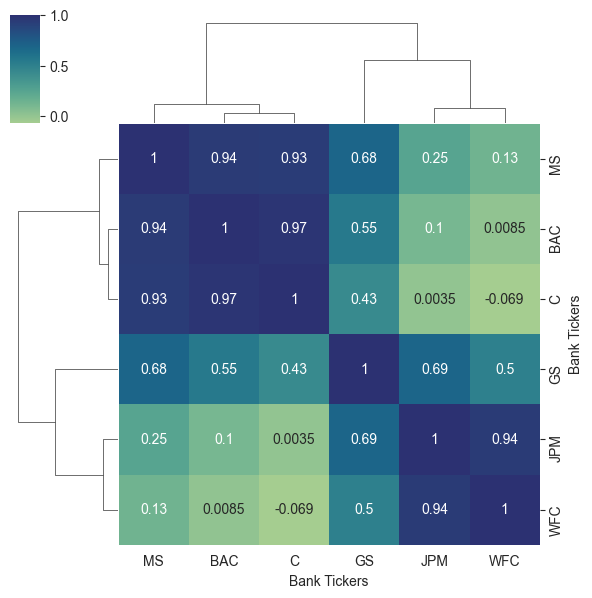

In [450]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level=1).corr(),figsize=(6,6),cmap = 'crest',annot= True)

**Observations**

- _Basically what clustermap does is that it creates a cluster based on the closed data._
- _If you see on the both X and the Y axis, the map BAC lies between MS and C whereas in the heatmap its had very strong relationship with the City bank and Morgan Stanley and Wells Fargo and JPMorgan were close to eachother.So in the cluster map WFC and JPM has put together._
 

## USING CUFFLINKS

#### Use .plot(kind='candle') to create a candle plot of Bank of americas stock from Jans 1st 2015 to Jan 1st 2016.

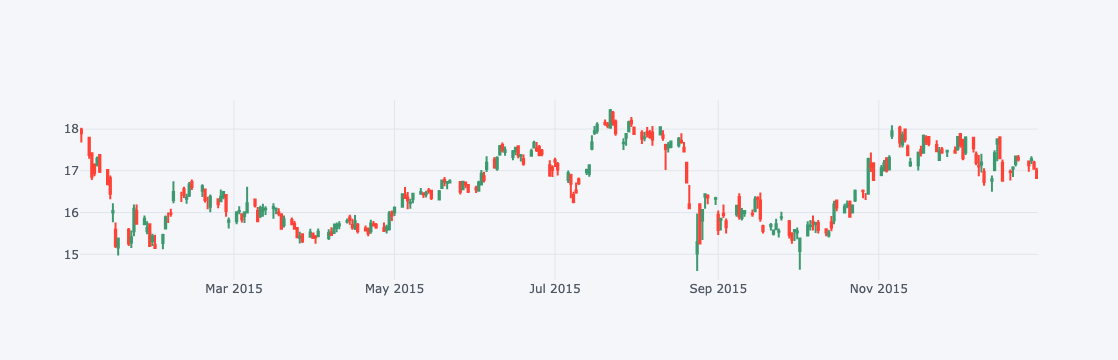

In [454]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')


#### Use .ta_plot(study='sma') to create a Simple Moving Average plot of Morgan Stanley for the year 2015.

/Users/tanveer/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



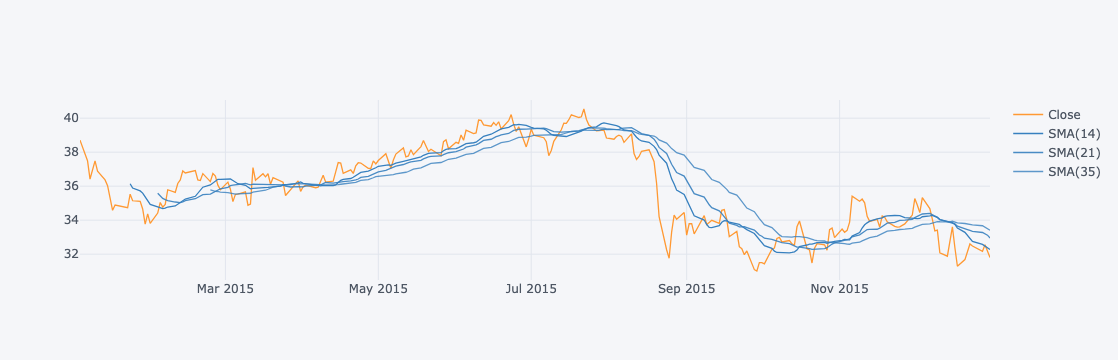

In [461]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma',period=[14,21,55])

- _Simple moving average smoothens the edges of the stock._
- _period=[14,21,55] -> This gives the simple moving averages of 14th 21 and 55th day._

/Users/tanveer/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



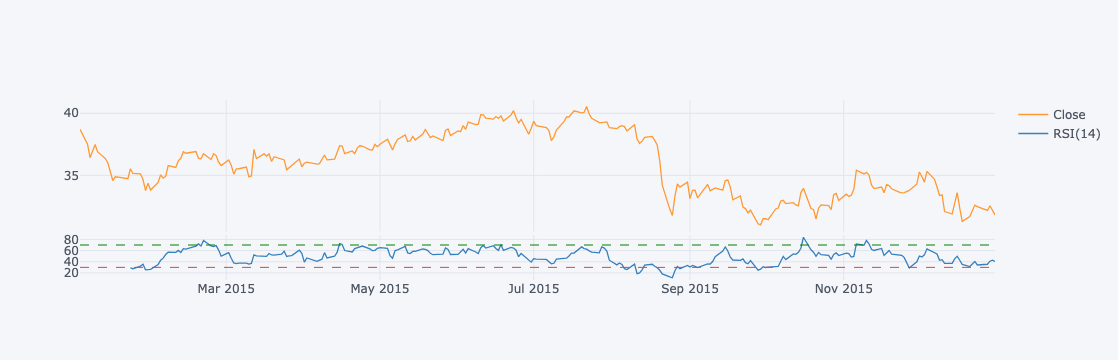

In [462]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='rsi')

#### Use .ta_plot(study='boll') to create a Bollinger Band plot for Bank of Americs for the year 2015.

/Users/tanveer/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



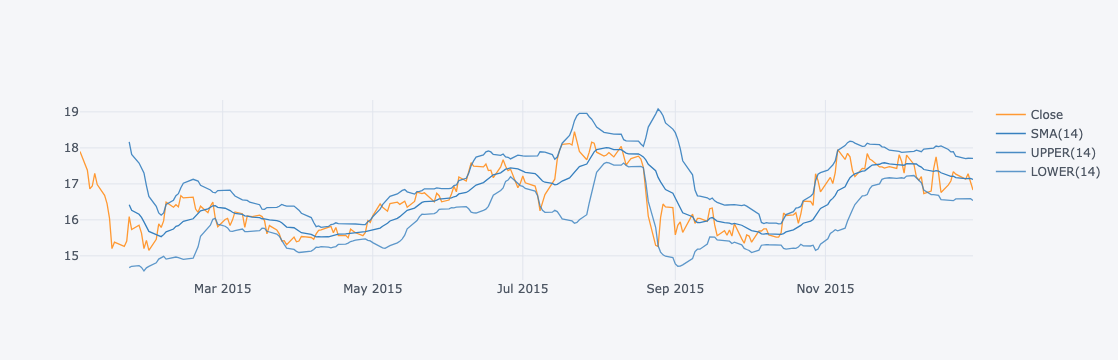

In [465]:
BAC.loc['2015-01-01':'2015-12-31']['Close'].ta_plot(study='boll')

- _What the bollinger does is it creates a simple moving average and has a upper line and a lower line aswell._

Just update the start and end dates, and return the codes to analyze the last 10 years performance.